#### Task 3
"Create a notebook called assignment03-pie.ipynb

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.

Marks will be given for:

- Just creating the pie chart
- Making it look nice
- And as always, a very small amount of marks will be given for just pushing something to your repository this week
- As always, your code should be well laid out

If you are having difficulties, know I will be doing more on Pie charts later in this module."

Let's start off by importing pandas to handle the data and matplotlib.pyplot for creating the chart. We'll load the .csv ito a dataframe (df). To make sure everything is loaded correctly, I'll display the first few rows and check the structure of the dataframe. 

In [33]:
## Import the pandas library and the matplotlib.pyplot module
import pandas as pd
import matplotlib.pyplot as plt

## The location of our .csv is
address = 'https://drive.google.com/uc?export=download&id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK'

## Lets read in the .csv file, which we know is at the previously referenced URL
df = pd.read_csv(address)

## Let's show the first few rows and the DF info before creating the chart
print("DF Head:")
print(df.head())

print("\nDF Info:")
print(df.info())




DF Head:
   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  

DF Info:
<class 'pandas.core.frame.DataF

This looks good; we're now ready to create the chart.

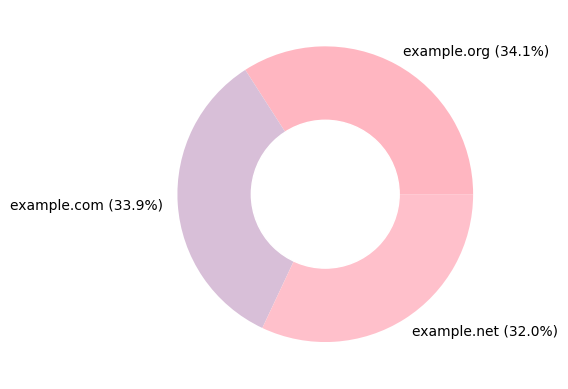

In [34]:
# We need to create a function to extract the domain -  by splitting the email string at the @ symbol. Might come back here to try doing this with a regular expression
def extractdomain(email):
    return email.split('@')[-1]

# We'll define our colour palette
colours = ["#FFB6C1", "#D8BFD8", "#FFC0CB"]

# Calculate the total number of each domain - we apply the function extractdomain to every entry in the Email column of the dataframe. 
## We the count the occurances of each unique domain - https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html and 
## store the reults in the domaintotals variable 

domaintotals = df['Email'].apply(extractdomain).value_counts()

## We now need to calculate the total number of email occurances by summing up the counts in domaintotals. 
## We create a list of labels that include each domain along with its percentage of the total (formatted as a %)
## zip allows us to loop over each domain and its count together

total = domaintotals.sum()
labels = [f'{domain} ({count / total:.1%})' for domain, count in zip(domaintotals.index, domaintotals)]

# We make a donut chart, adapted from https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/
plt.pie(domaintotals, labels=labels, colors=colours[:len(domaintotals)], pctdistance=0.85)
plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white')) 

plt.show()